In [ ]:
# David Bourgin
# QuACK Workshop, 11/2/17
# Dimensionality Reduction and Factor Analysis

# Eigenfaces

In [11]:
installed <- installed.packages()
if (!"pixmap" %in% installed) {install.packages("pixmap")}

library("pixmap")
options(warn=-1)

## Example Images
![](https://www.cl.cam.ac.uk/research/dtg/attarchive/images/pictures/faces.gif)

In [12]:
# helper functions for loading, displaying, and reconstructing an image
loadPGM <- function(fp) {
    x = read.pnm(file=fp)
    img <- apply(x@grey, 2, rev)
    return(t(img))
}

displayFace <- function(img) {
    options(repr.plot.width=5, repr.plot.height=7)
    image(img, axes=F, col = grey(seq(0, 1, length=256)))
}

mat2vec <- function(img) {
    return(as.vector(img))
}

vec2mat <- function(vec, w, h) {
    return(matrix(vec, nrow=92, ncol=112))
}

buildDataset <- function() {
    data = matrix(NA, nrow=400, ncol=10304)
    imgId = 0
    for (i in 1:40) {
        imgs = Sys.glob(file.path("data/orl_faces", sprintf("s%i", i), "*.pgm"))
        for (j in 1:length(imgs)) {
            imgId = imgId + 1
            imgVec = mat2vec(loadPGM(imgs[j]))
            data[imgId,] = imgVec
        }
    }
    return(data)
}

pcaCharts <- function(x) {
    options(repr.plot.width=10, repr.plot.height=7)
    x.var <- x$sdev ^ 2
    x.pvar <- x.var/sum(x.var)
    
    par(mfrow=c(2,2))
    plot(x.pvar,xlab="Principal component", ylab="Proportion Variance Explained", ylim=c(0,1), type='b')
    plot(cumsum(x.pvar),xlab="Principal component", ylab="Cumulative Proportion Variance Explained", ylim=c(0,1), type='b')
    screeplot(x)
    screeplot(x,type="l")
    par(mfrow=c(1,1))
}

eigenFaces <- function(pca) {
    par(mfrow=c(3,3),  mar=c(0, 0, 1, 0))
    for (i in 1:9) {
       displayFace(vec2mat(pca$rotation[,i]))
        title(sprintf("PC %i", i))
    }
}

reconstruct <- function(face_idx, pca, n_pcs) {
    rr = pca$x[, 1:n_pcs] %*% t(pca$rotation[, 1:n_pcs])
    rr = scale(rr, center = -1 * pca$center, scale=FALSE)
    return(rr[face_idx,])
}

reconstruct_face <- function(face_idx, faces, pca) {
    face = vec2mat(faces[face_idx,])
    par(mfrow=c(3,3), mar=c(0, 0, 1, 0))    
    displayFace(face)
    title("Original")

    for (i in 1:8) {
        displayFace(vec2mat(reconstruct(face_idx, pca, i * 15)))
        title(sprintf("%i PCs", i * 15))
    }
}

In [13]:
# construct dataset
faces = scale(buildDataset())

[1] "`faces` dataset: 400 faces x 10304 pixels"

[1] "`face_vec` dimension: 1 x 10304"

[1] "`face_mat` dimension: 92 x 112"

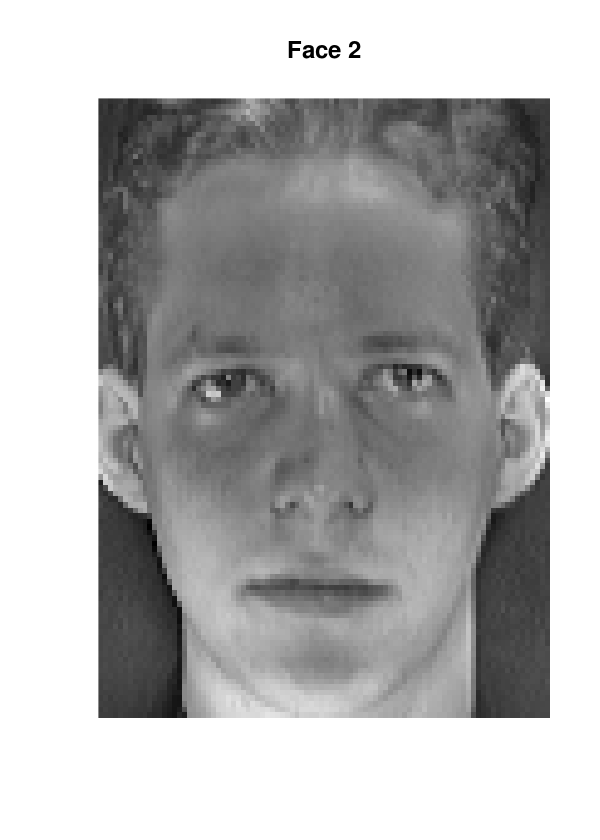

In [14]:
# Each face is stored in `faces` as a 1 x 10304 vector of pixel intensities. 
# We can transform this vector back into an image using the helper functions `vec2mat` and `displayFace`
face_vec = faces[2,]
face_mat = vec2mat(face_vec)

sprintf("`faces` dataset: %i faces x %i pixels", dim(faces)[1], dim(faces)[2])
sprintf("`face_vec` dimension: 1 x %i", length(face_vec))
sprintf("`face_mat` dimension: %i x %i", dim(face_mat)[1], dim(face_mat)[2])

displayFace(face_mat)
title("Face 2")

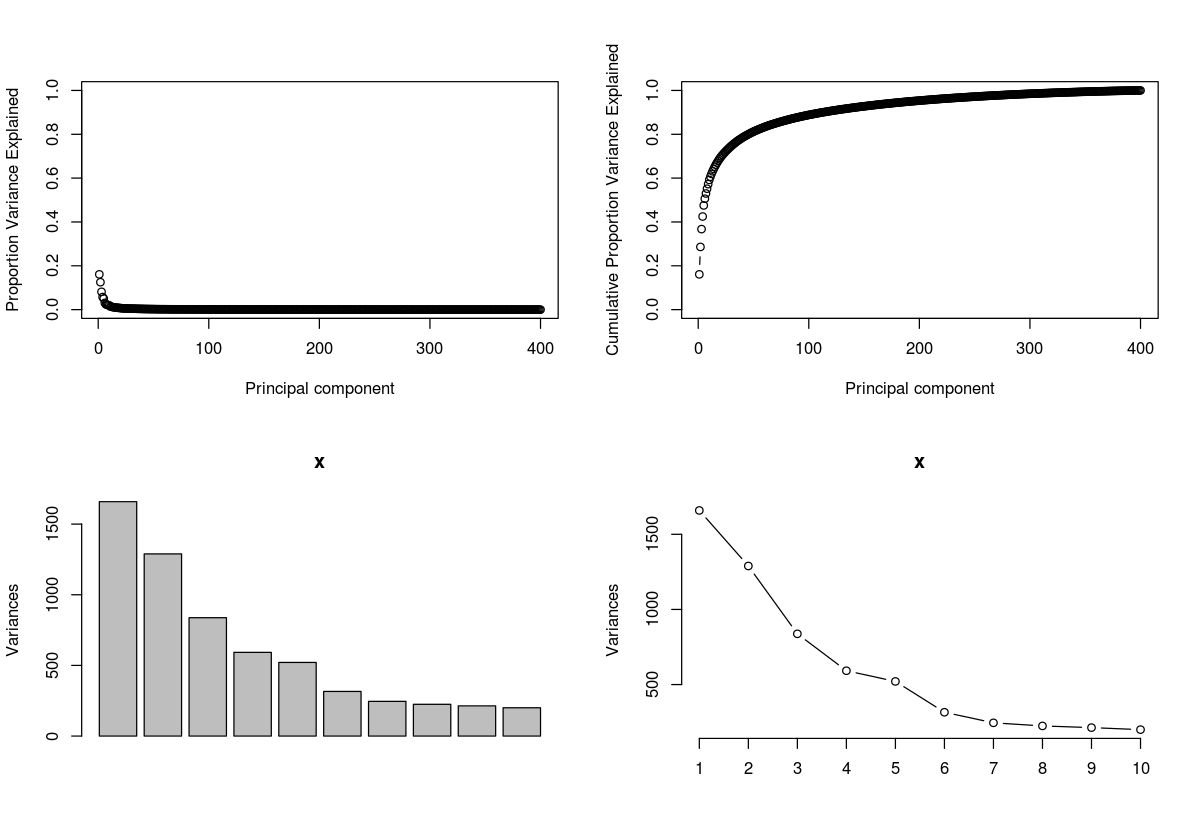

In [15]:
pca = prcomp(faces, center=FALSE, scale=FALSE)
pcaCharts(pca)

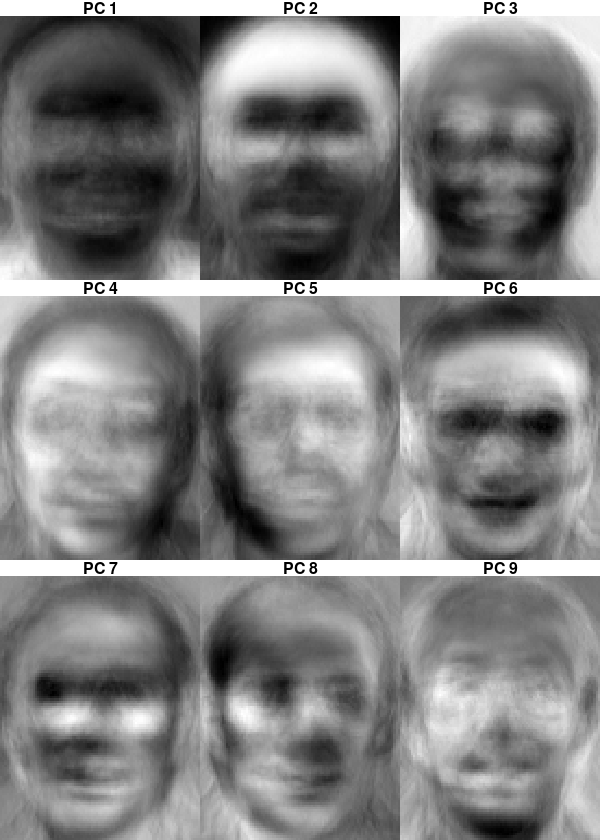

In [6]:
# display the first 10 principal components ("eigenfaces")
eigenFaces(pca)

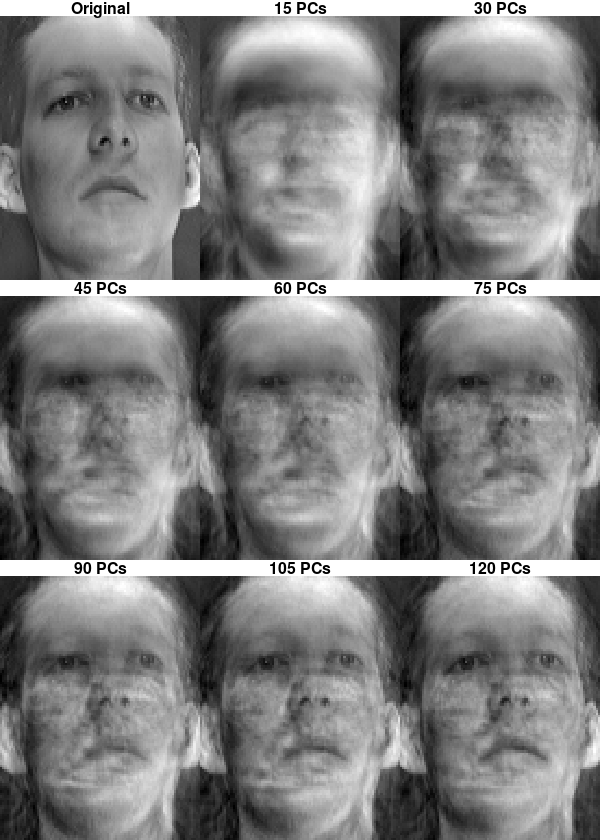

In [10]:
# perform a noisy reconstruction of a face using linear combos of pcs 
face_idx = 10
reconstruct_face(face_idx, faces, pca)